# Upload Files

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-red_test.csv to winequality-red_test.csv


# Read Files

In [ ]:
import pandas as pd

#Loading dataset
wine = pd.read_csv('winequality-red.csv')
wine_test = pd.read_csv('winequality-red_test.csv')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.670,0.02,2.20,0.072,31,92,0.99566,3.32,0.68,11.066667
1,7.2,0.370,0.32,2.00,0.062,15,28,0.99470,3.23,0.73,11.300000
2,7.4,0.785,0.19,5.20,0.094,19,98,0.99713,3.16,0.52,9.566667
3,6.9,0.630,0.02,1.90,0.078,18,30,0.99712,3.40,0.75,9.800000
4,6.9,0.580,0.20,1.75,0.058,8,22,0.99322,3.38,0.49,11.700000


In [ ]:
'''
0: 주석산 농도
1: 아세트산 농도
2: 구연산 농도
3: 잔류 당분 농도
4: 염화 나트륨 농도
5: 유리 아황산 농도
6: 총 아황산 농도
7: 밀도
8: pH 농도
9: 황산칼륨 농도
10: 알코올 도수
'''
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1439 non-null   float64
 1   volatile acidity      1439 non-null   float64
 2   citric acid           1439 non-null   float64
 3   residual sugar        1439 non-null   float64
 4   chlorides             1439 non-null   float64
 5   free sulfur dioxide   1439 non-null   float64
 6   total sulfur dioxide  1439 non-null   float64
 7   density               1439 non-null   float64
 8   pH                    1439 non-null   float64
 9   sulphates             1439 non-null   float64
 10  alcohol               1439 non-null   float64
 11  quality               1439 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 135.0 KB


# Labeling

In [ ]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

wine['quality'].value_counts()

1    769
0    670
Name: quality, dtype: int64

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,8.469215,0.524284,0.278596,2.541869,0.088875,15.554552,46.966644,0.996857,3.302467,0.659034,10.404077,0.534399
std,1.743294,0.179335,0.195024,1.359377,0.048561,10.408869,33.239259,0.001890,0.154918,0.175224,1.079780,0.498989
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.200000,0.390000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995720,3.200000,0.550000,9.500000,0.000000
50%,8.100000,0.510000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996820,3.300000,0.620000,10.100000,1.000000
75%,9.400000,0.630000,0.435000,2.600000,0.091000,21.000000,63.000000,0.998000,3.390000,0.730000,11.050000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [ ]:
# # Outlier 제거

# for col in wine.columns[:-1]:
#   a = max(wine[col])
#   b = min(wine[col])
#   c = a - b
#   low = b + c * 0.001
#   high = a - c * 0.001
#   wine = wine[wine[col] < high]
#   wine = wine[low < wine[col]]

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,8.469215,0.524284,0.278596,2.541869,0.088875,15.554552,46.966644,0.996857,3.302467,0.659034,10.404077,0.534399
std,1.743294,0.179335,0.195024,1.359377,0.048561,10.408869,33.239259,0.001890,0.154918,0.175224,1.079780,0.498989
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.200000,0.390000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995720,3.200000,0.550000,9.500000,0.000000
50%,8.100000,0.510000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996820,3.300000,0.620000,10.100000,1.000000
75%,9.400000,0.630000,0.435000,2.600000,0.091000,21.000000,63.000000,0.998000,3.390000,0.730000,11.050000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


# Making Dataset

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

# train : val= 9 : 1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1290,7.6,0.740,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0
1291,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7


In [ ]:
X_val

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1295,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1297,7.2,0.530,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1
1298,5.7,0.600,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
...,...,...,...,...,...,...,...,...,...,...,...
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
1436,10.0,0.380,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5
1437,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.1


In [ ]:
from autograd import numpy as np

X_train = X_train.to_numpy()
X_val = X_val.to_numpy()

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

X_test = wine_test.to_numpy()

In [ ]:
print(y_train.shape)
print(len(y_train[y_train == 0]))

(1295,)
592


# Data Preprocessing

## Data Scaling

In [ ]:
def z_score_scale(x):
  mu = np.mean(x, axis=0)
  sigma = np.std(x, axis=0)

  return (x - mu) / sigma

In [ ]:
# # MinMax
# from sklearn.preprocessing import MinMaxScaler

# norm = MinMaxScaler()
# norm_fit = norm.fit(X_train)
# X_train = norm_fit.transform(X_train)
# X_val = norm_fit.transform(X_val)
# X_test = norm_fit.transform(X_test)

In [ ]:
# z-score normalization
X_train = z_score_scale(X_train)
X_val = z_score_scale(X_val)
X_test = z_score_scale(X_test)

## PCA

In [ ]:
from sklearn import decomposition

def pca(x, n):
  pca = decomposition.PCA()
  pca.n_components = n
  
  return pca.fit_transform(x)

In [ ]:
# N = 2
# X_train = pca(X_train, N)
# X_val = pca(X_val, N)
# X_test = pca(X_test, N)

# X_train.shape

In [ ]:
# import seaborn as sn
# import matplotlib.pyplot as plt

# pca_data = np.vstack((X_train.T, y_train)).T

# # creating a new data fram which help us in ploting the result data
# pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
# sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
# plt.show()

# Modeling

In [ ]:
def logistic(x):
    """Logistic/sigmoid function.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input to the logistic function.
    
    Returns
    -------
    numpy.ndarray
        The output.
        
    Notes
    -----
    The function does not restrict the shape of the input array. The output
    has the same shape as the input.
    """
    
    out = 1. / (1. + np.exp(-x))

    return out

In [ ]:
def logistic_model(x, params):
    """A logistic regression model.
    
    A a logistic regression is y = sigmoid(x * w + b), where the operator *
    denotes a mat-vec multiplication.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elemets
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar (the intercept)

    Returns
    -------
    probabilities : numpy.ndarray
        The output is a 1D array with length n_samples.
    """
    for i in range(len(params)-1):
      x = np.dot(x, params[i])
      
    out = logistic(x + params[1])

    return out

In [ ]:
def model_loss(x, true_labels, params, _lambda=1.0):
    """Calculate the predictions and the loss w.r.t. the true values.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    true_labels : numpy.ndarray
        The true labels of the input images. Should be 1D and have length of
        n_images.
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second elenment is a scalar.
    _lambda : float
        The weight of the regularization term. Default: 1.0
    
    Returns
    -------
    loss : a scalar
        The summed loss.
    """
    pred = logistic_model(x, params)
    
    loss = - (
        np.dot(true_labels, np.log(pred+1e-15)) +
        np.dot(1.-true_labels, np.log(1.-pred+1e-15))
    ) + _lambda * np.sum(params[0]**2)
    
    return loss

In [ ]:
def classify(x, params):
    """Use a logistic model to label data with 0 or/and 1.
    
    Arguments
    ---------
    x : numpy.ndarray
        The input of the model. The shape should be (n_images, n_total_pixels).
    params : a tuple/list of two elements
        The first element is a 1D array with shape (n_total_pixels). The
        second element is a scalar.
    
    Returns
    -------
    labels : numpy.ndarray
        The shape of the label is the same with `probability`.
    
    Notes
    -----
    This function only works with multiple images, i.e., x has a shape of
    (n_images, n_total_pixels).
    """
    probabilities = logistic_model(x, params)
    labels = (probabilities >= 0.5).astype(float)
    return labels

In [ ]:
def performance(predictions, answers, beta=1.0):
    """Calculate precision, recall, and F-score.
    
    Arguments
    ---------
    predictions : numpy.ndarray of integers
        The predicted labels.
    answers : numpy.ndarray of integers
        The true labels.
    beta : float
        A coefficient representing the weight of recall.
    
    Returns
    -------
    precision, recall, score, accuracy : float
        Precision, recall, and F-score, accuracy respectively.
    """
    true_idx = (answers == 1)  # the location where the answers are 1
    false_idx = (answers == 0)  # the location where the answers are 0
    
    # true positive: answers are 1 and predictions are also 1
    n_tp = np.count_nonzero(predictions[true_idx] == 1)
    
    # false positive: answers are 0 but predictions are 1
    n_fp = np.count_nonzero(predictions[false_idx] == 1)
    
    # true negative: answers are 0 and predictions are also 0
    n_tn = np.count_nonzero(predictions[false_idx] == 0)
    
    # false negative: answers are 1 but predictions are 0
    n_fn = np.count_nonzero(predictions[true_idx] == 0)
    
    # precision, recall, and f-score
    precision = n_tp / (n_tp + n_fp)
    recall = n_tp / (n_tp + n_fn)
    score = (
        (1.0 + beta**2) * precision * recall / 
        (beta**2 * precision + recall)
    )

    accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

    return precision, recall, score, accuracy

## Parameter Initialize

In [ ]:
# Hyper Parameters
LEARNING_RATE = 1e-5
LAMBDA = 1
EARLY_STOP = 1e-5
STEP = 10000

In [ ]:
from autograd import grad

gradients = grad(model_loss, argnum=2)

# initialize parameters
w = np.zeros(X_train.shape[1], dtype=float)
b = 0.
params = (w, b)

# Train

In [ ]:
change = np.inf         # a variable for the change in validation loss
i = 0                   # a counter for optimization iterations
old_val_loss = 1e-15    # a variable to store the validation loss from the previous iteration

x_loss = []
x_accuracy = []
x_fscore = []
while change >= EARLY_STOP and i < STEP:
    
    # calculate gradients and use gradient descents
    grads = gradients(X_train, y_train, params, LAMBDA)
    w -= (grads[0] * LEARNING_RATE)
    b -= (grads[1] * LEARNING_RATE)
    
    # validation loss
    val_loss = model_loss(X_val, y_val, params)
    
    # calculate the chage in validation loss
    change = np.abs((val_loss-old_val_loss)/old_val_loss)

    # update the counter and old_val_loss
    i += 1
    old_val_loss = val_loss
    
    # calculate f-scores against the validation dataset
    pred_labels_val = classify(X_val, params)
    score = performance(pred_labels_val, y_val)
    x_loss.append(val_loss)
    x_fscore.append(score[2])
    x_accuracy.append(score[3])

    # print the progress every 100 steps
    if i % 200 == 0:
        print("step: {}".format(i), end="\n")

print("")
print("Upon optimization stopped:")
print("    Change in validation loss:", change)
print("    Iterations:", i)

pred_labels_val = classify(X_val, params)
score = performance(pred_labels_val, y_val)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])

step: 200
step: 400
step: 600
step: 800

Upon optimization stopped:
    Change in validation loss: 9.975102486164378e-06
    Iterations: 881
    Validation loss: 77.37549763989992
    Validation precision: 0.7285714285714285
    Validation recall: 0.7727272727272727
    Validation F-score: 0.75
    Validation Accuracy: 0.7638888888888888


    Best: scale, N, Learning_Rate, Lambda = z, X, 1e-5, 1

    Iterations: 651
    Validation loss: 79.17810189017972
    Validation precision: 0.7
    Validation recall: 0.8484848484848485
    Validation F-score: 0.7671232876712328
    Validation Accuracy: 0.7638888888888888

# Accuracy Visualization

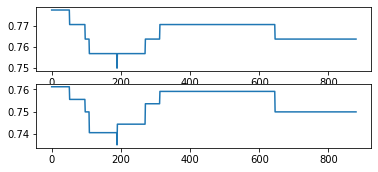

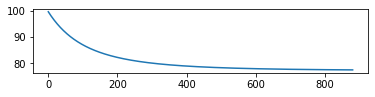

In [ ]:
import matplotlib.pyplot as plt

s = [i for i in range(len(x_accuracy))]
plt.subplot(3, 1, 1)
plt.plot(s, x_accuracy)
plt.subplot(3, 1, 2)
plt.plot(s, x_fscore)
plt.show()
plt.subplot(3, 1, 3)
plt.plot(s, x_loss)
plt.show()

# Test

In [ ]:
pred_test = classify(X_test, (w, b))
pred_test

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [ ]:
submission = pd.read_csv('sample_sub.csv')

submission['quality'] = pred_test.astype(int)

submission.to_csv('submission.csv', index=False)